In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = pd.read_csv('ecommerce_customer_data_large.csv')
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [ ]:
# Ubah tipe data kolom `Purchase Date` menjadi `datetime`
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Tampilkan tipe data kolom `Purchase Date` setelah transformasi
print(df['Purchase Date'].dtype)

datetime64[ns]


In [ ]:
# Mengubah format 'Purchase Date' agar hanya berisi hari, bulan, dan tahun
df['Purchase Date'] = df['Purchase Date'].dt.strftime('%Y-%m-%d')

print("DataFrame setelah mengubah format 'Purchase Date':")
df

DataFrame setelah mengubah format 'Purchase Date':


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0


In [ ]:
df.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [ ]:
# Membuat tabel kontingensi untuk Returns dan Churn
contingency_table = pd.crosstab(df['Returns'], df['Churn'])

# Melakukan uji Chi-Square
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Menampilkan hasil
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(ex)

# Menentukan apakah ada korelasi berdasarkan P-Value
alpha = 0.05
if p < alpha:
    print("Ada hubungan signifikan antara Returns dan Churn (tolak H0).")
else:
    print("Tidak ada hubungan signifikan antara Returns dan Churn (gagal tolak H0).")

Chi-Square Statistic: 3.348852875752015
P-Value: 0.06725186417138425
Degrees of Freedom: 1
Expected Frequencies:
[[80803.58165612 20338.41834388]
 [81070.41834388 20405.58165612]]
Tidak ada hubungan signifikan antara Returns dan Churn (gagal tolak H0).


In [ ]:
columns_to_drop = [
    'Returns'
]

df = df.drop(columns_to_drop, axis=1)

In [ ]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,70.000000,1.00000


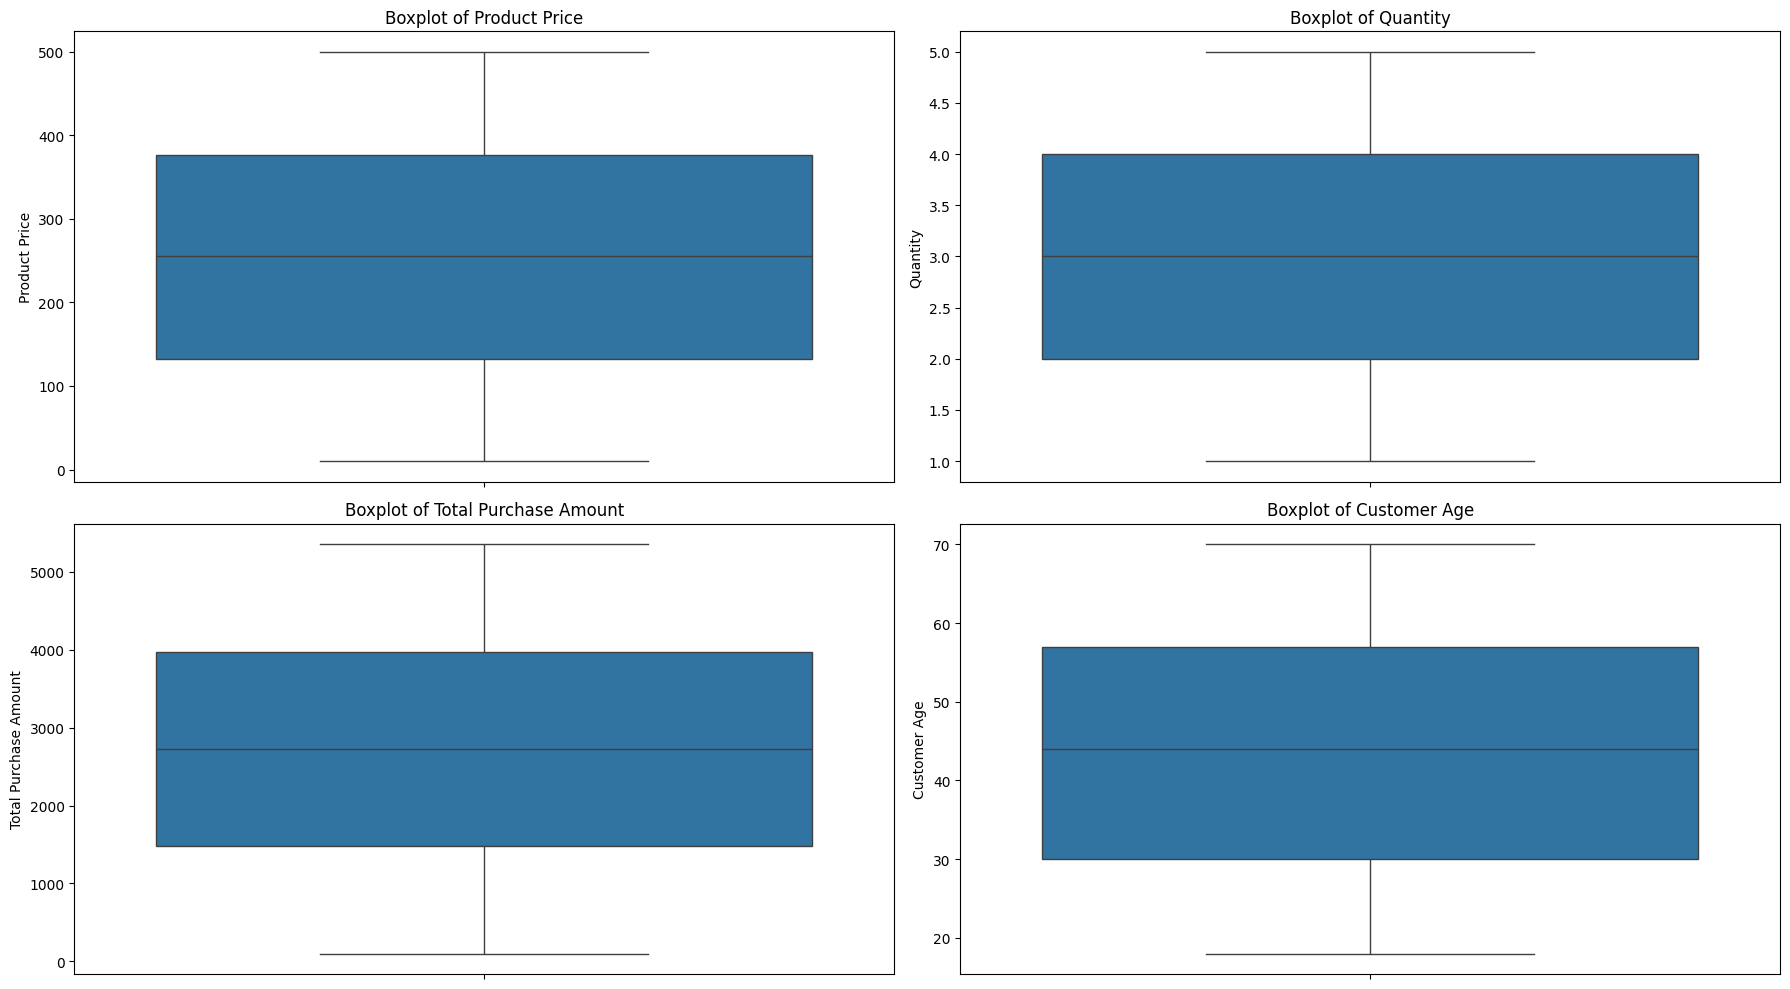

In [ ]:
# Membuat boxplot untuk mengecek outlier pada kolom numerik
numerical_cols = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age']

plt.figure(figsize=(18, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

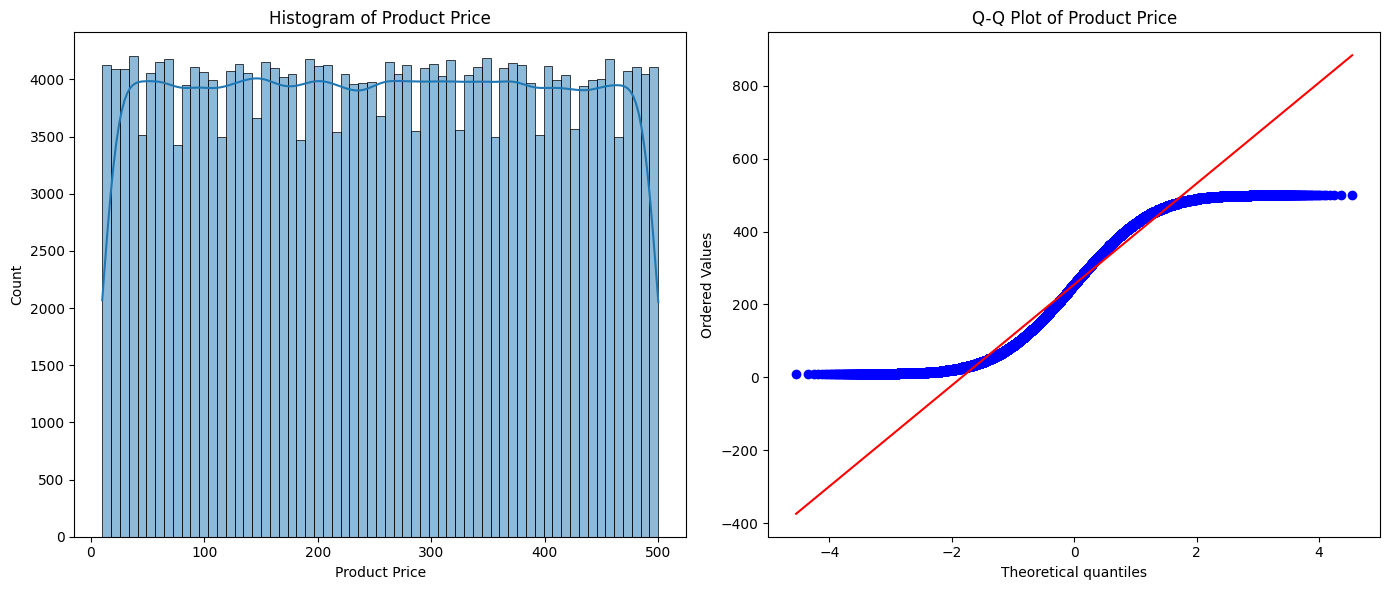

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for Product Price:
Statistic: 0.9551755785942078, p-value: 0.0
Product Price does not seem to be normally distributed.



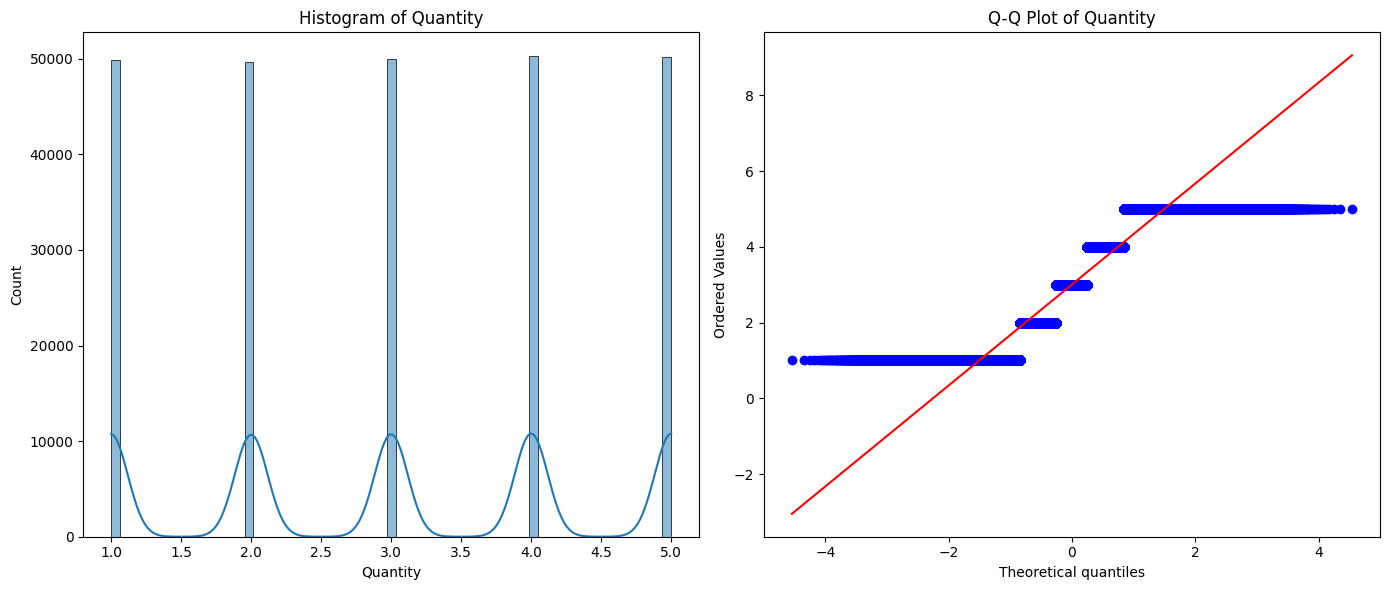

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for Quantity:
Statistic: 0.8878287076950073, p-value: 0.0
Quantity does not seem to be normally distributed.



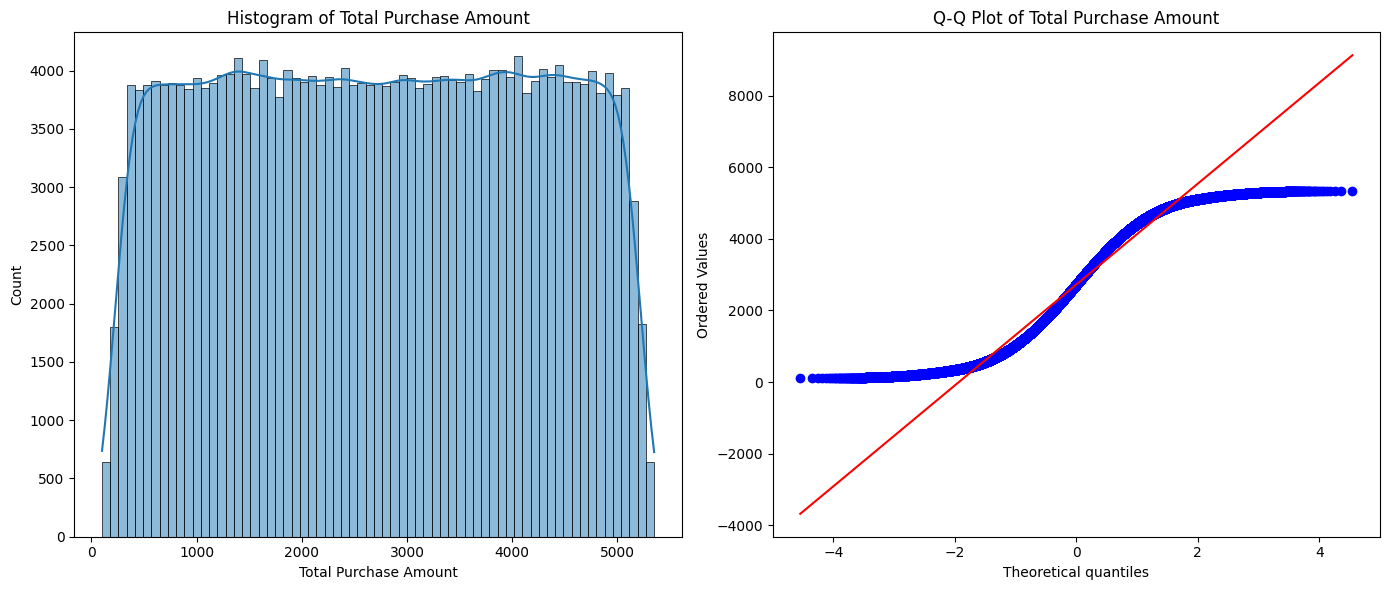

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for Total Purchase Amount:
Statistic: 0.9565790891647339, p-value: 0.0
Total Purchase Amount does not seem to be normally distributed.



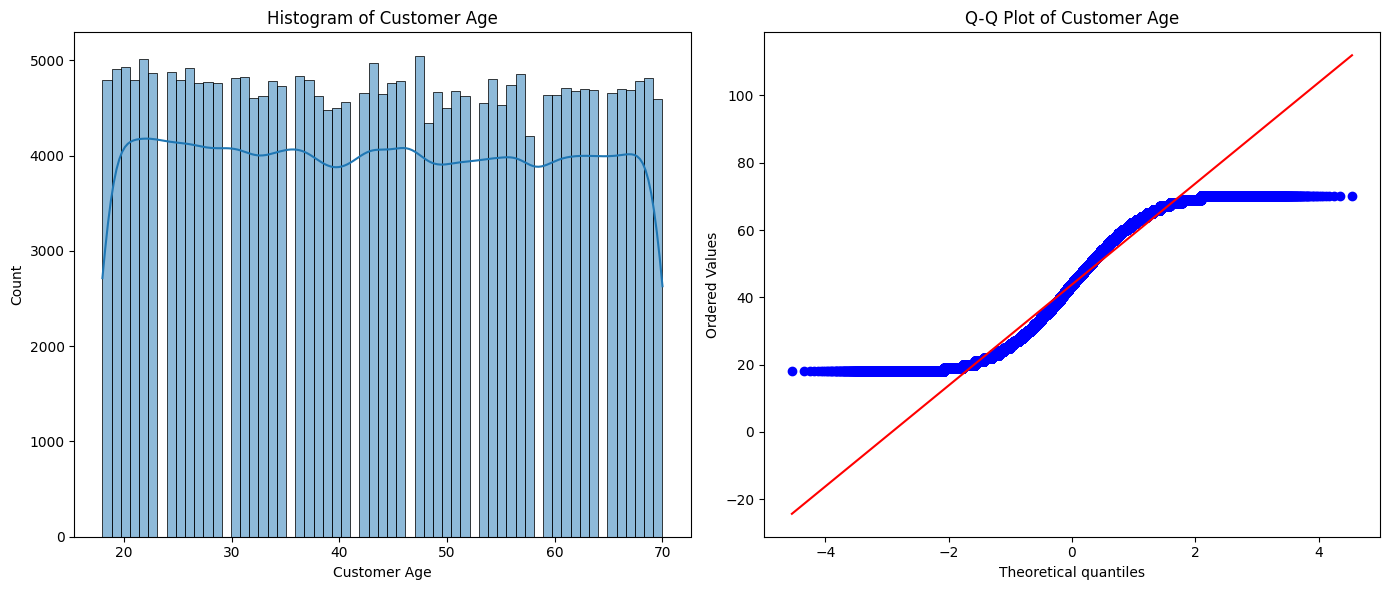

Shapiro-Wilk Test for Customer Age:
Statistic: 0.9526703953742981, p-value: 0.0
Customer Age does not seem to be normally distributed.



/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Kolom yang akan dicek
numerical_cols = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age']

# Fungsi untuk menampilkan histogram dan Q-Q plot
def plot_distribution(data, col_name):
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col_name], kde=True)
    plt.title(f'Histogram of {col_name}')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data[col_name], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col_name}')

    plt.tight_layout()
    plt.show()

# Fungsi untuk melakukan uji Shapiro-Wilk
def shapiro_test(data, col_name):
    stat, p = stats.shapiro(data[col_name])
    print(f'Shapiro-Wilk Test for {col_name}:')
    print(f'Statistic: {stat}, p-value: {p}')
    if p > 0.05:
        print(f'{col_name} seems to be normally distributed.\n')
    else:
        print(f'{col_name} does not seem to be normally distributed.\n')

# Plot dan uji untuk setiap kolom
for col in numerical_cols:
    plot_distribution(df, col)
    shapiro_test(df, col)

In [ ]:
#Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Mendeteksi outlier pada kolom yang disebutkan
numerical_cols = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age']

outliers = {}
for col in numerical_cols:
    outliers[col] = detect_outliers_iqr(df[col])

# Menampilkan hasil outlier untuk setiap kolom
for col, outlier_values in outliers.items():
    print(f"Outliers in {col}:")
    print(outlier_values)
    print()

Outliers in Product Price:
Series([], Name: Product Price, dtype: int64)

Outliers in Quantity:
Series([], Name: Quantity, dtype: int64)

Outliers in Total Purchase Amount:
Series([], Name: Total Purchase Amount, dtype: int64)

Outliers in Customer Age:
Series([], Name: Customer Age, dtype: int64)



In [ ]:
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Customer Name,Age,Gender,Churn
0,44605,2023-05-03,Home,177,1,2427,PayPal,31,John Rivera,31,Female,0
1,44605,2021-05-16,Electronics,174,3,2448,PayPal,31,John Rivera,31,Female,0
2,44605,2020-07-13,Books,413,1,2345,Credit Card,31,John Rivera,31,Female,0
3,44605,2023-01-17,Electronics,396,3,937,Cash,31,John Rivera,31,Female,0
4,44605,2021-05-01,Books,259,4,2598,PayPal,31,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24,Home,436,1,3664,Cash,63,Gabriel Williams,63,Male,0
249996,20455,2021-06-04,Electronics,233,1,4374,Credit Card,66,Barry Foster,66,Female,0
249997,28055,2022-11-10,Electronics,441,5,5296,Cash,63,Lisa Johnson,63,Female,0
249998,15023,2021-06-27,Electronics,44,2,2517,Cash,64,Melissa Fernandez,64,Male,0


In [ ]:
columns_to_drop = [
    'Age'
]

df = df.drop(columns_to_drop, axis=1)

In [ ]:
csv_file_path = 'cleaned_data_fix.csv'
df.to_csv(csv_file_path, index=False)

print(f"Data telah disimpan ke dalam file {csv_file_path}")

Data telah disimpan ke dalam file cleaned_data_fix.csv
